<a href="https://colab.research.google.com/github/sonni-a/cs102/blob/homework_06/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6_22_23_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.*

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [ ]:
from google.colab import files, drive
import seaborn
import numpy
import random
import pandas as pd
import matplotlib.pyplot as plt

dataset = files.upload() #1
for fn in dataset.keys():
  print(f"User uploaded file '{fn}' with length {len(dataset[fn])} bytes")

ds = pd.read_csv("music_genre.csv") #2
ds = ds.sample(n=20000)
ds

duplicates = ds[ds.duplicated()] # 3
if len(duplicates) == 0:
  print('Дупликатов нет.')
else:
  print('Дупликаты есть.')
ds = ds.drop_duplicates()
ds

empty_fields = ds[ds["artist_name"] == "empty_field"] # 4
empty_fields
print(f'Количество строк без артиста: {empty_fields.shape[0]}')
ds = ds[(ds.artist_name != 'empty_field')]
ds


Saving music_genre.csv to music_genre (6).csv
User uploaded file 'music_genre (6).csv' with length 7537937 bytes
Дупликаты есть.
Количество строк без артиста: 984


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10088,74480.0,The Dave Brubeck Quartet,Pick up Sticks,39.0,0.810000,0.516,256467.0,0.306,0.305000,F,0.1780,-15.786,Minor,0.0356,138.77700000000002,3-Apr,0.496,Jazz
49996,20269.0,Unknown Mortal Orchestra,So Good at Being in Trouble,57.0,0.036300,0.829,230147.0,0.435,0.878000,C,0.1190,-10.136,Major,0.0515,103.816,4-Apr,0.594,Hip-Hop
34961,74507.0,Dinah Washington,Stormy Weather,30.0,0.876000,0.463,196933.0,0.252,0.000007,D,0.2060,-14.245,Major,0.0366,108.42399999999999,3-Apr,0.333,Blues
26263,89480.0,Macklemore & Ryan Lewis,Thrift Shop (feat. Wanz),72.0,0.061900,0.781,235613.0,0.526,0.000000,F#,0.0457,-6.985,Minor,0.2930,94.992,4-Apr,0.662,Rap
19779,86109.0,Breaking Benjamin,Polyamorous,48.0,0.000132,0.544,176947.0,0.895,0.107000,C#,0.1470,-6.207,Major,0.0522,98.12799999999999,4-Apr,0.875,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14843,68649.0,Miles Davis,Israel - Remastered,35.0,0.888000,0.374,138360.0,0.366,0.057100,C,0.0812,-9.687,Minor,0.0412,174.85299999999998,4-Apr,0.731,Jazz
17567,83081.0,Eve 6,Think Twice,44.0,0.002920,0.526,223493.0,0.840,0.000000,B,0.2720,-4.159,Major,0.0342,93.97200000000001,4-Apr,0.433,Alternative
4944,90624.0,Yellow Claw,Danger Days,0.0,0.012500,0.547,178219.0,0.855,0.635000,F,0.5360,-5.937,Minor,0.0677,155.02700000000002,4-Apr,0.352,Electronic
10398,82698.0,Etta James,These Foolish Things,36.0,0.834000,0.428,314360.0,0.300,0.002590,C,0.0575,-10.515,Major,0.0386,170.805,3-Apr,0.226,Jazz


### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

Electronic     0.103615
Jazz           0.103510
Anime          0.101089
Blues          0.099984
Country        0.099247
Rap            0.099090
Classical      0.098879
Alternative    0.098669
Hip-Hop        0.098142
Rock           0.097774
Name: music_genre, dtype: float64


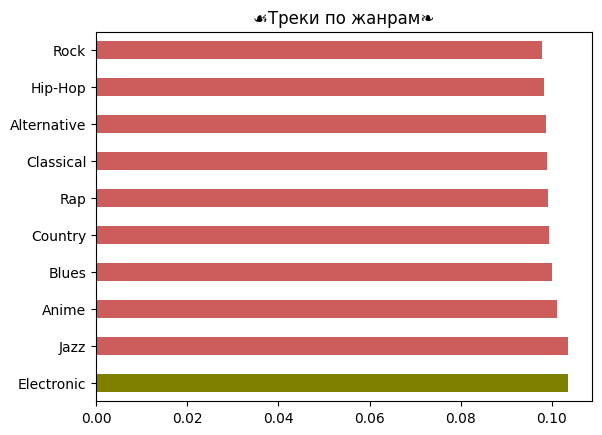

In [ ]:
ds = pd.read_csv("music_genre.csv") #1
ds = ds.sample(n=20000)
ds = ds.drop_duplicates()
ds = ds[(ds.artist_name != "empty_field")]
print(ds["music_genre"].value_counts(normalize=True))
ds = ds["music_genre"].value_counts(normalize=True)
ds

ds = ds.plot.barh(x='music_genre', y='Number_of_People',
             title='☙Треки по жанрам❧', color=['olive', 'indianred', 'indianred', 'indianred', 'indianred',
                                               'indianred', 'indianred', 'indianred', 'indianred', 'indianred']) #2

In [ ]:
ds = pd.read_csv("music_genre.csv") #3
ds = ds.sample(n=20000)
ds = ds.drop_duplicates()
ds = ds[(ds.artist_name != 'empty_field')]
ds

str = ds[ds["danceability"]==ds["danceability"].max()] #3
print(f'Самый танцевальный жанр: {str["music_genre"]}')

list_genre = (ds.music_genre.unique())[:-1] #4
all_mode = {}
for k in list_genre:
    if len(ds.loc[(ds["music_genre"] == k) & (ds["mode"] == "Major")]) < len(ds.loc[(ds["music_genre"] == k) & (ds["mode"] == "Minor")]):
        all_mode[k] = "Minor"
    elif len(ds.loc[(ds["music_genre"] == k) & (ds["mode"] == "Major")]) > len(ds.loc[(ds["music_genre"] == k) & (ds["mode"] == "Minor")]):
        all_mode[k] = "Major"
for k in all_mode:
    print(f"жанр: {k}, тональность: {all_mode[k]}")

Самый танцевальный жанр: 45608    Hip-Hop
Name: music_genre, dtype: object
жанр: Jazz, тональность: Major
жанр: Rock, тональность: Major
жанр: Classical, тональность: Major
жанр: Hip-Hop, тональность: Major
жанр: Anime, тональность: Major
жанр: Alternative, тональность: Major
жанр: Blues, тональность: Major
жанр: Electronic, тональность: Major
жанр: Country, тональность: Major
жанр: Rap, тональность: Major


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

Исполнитель с наибольшим количеством треков: Nobuo Uematsu    0.008939
Name: artist_name, dtype: float64
Исполнитель с наменьшим количеством треков: TK Kravitz    0.000053
Name: artist_name, dtype: float64
Между первой тройкой исполнителей и остальными большой разрыв


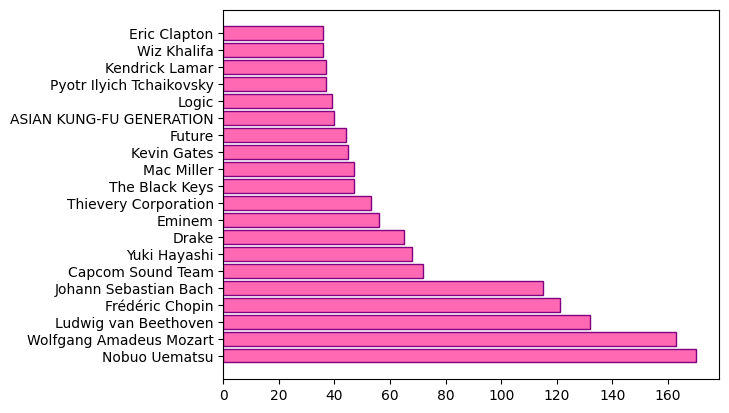

In [ ]:
print(f'Исполнитель с наибольшим количеством треков: {ds["artist_name"].value_counts(normalize=True).head(1)}') #1
print(f'Исполнитель с наменьшим количеством треков: {ds["artist_name"].value_counts(normalize=True).tail(1)}')


artists = (ds.artist_name.unique())[:-1] #2
d_artists = {}
for i in artists:
    d_artists[i] = len(ds.loc[ds["artist_name"] == i])
sort_artists = dict(sorted(d_artists.items(), key=lambda item: (item[1], item[0]), reverse=True)[:-1])
fig, diagram = plt.subplots()
x = list(sort_artists.keys())[:20]
y = list(sort_artists.values())[:20]

diagram.barh(x, y, color="hotpink", edgecolor="purple")
print("Между первой тройкой исполнителей и остальными большой разрыв")

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [ ]:
ds.corr()

<ipython-input-186-31b754434382>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.corr()


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.000000,0.005620,-0.010599,0.003908,-0.007311,0.012501,-0.010100,0.008257,0.011523,-0.003256,0.011629
popularity,0.005620,1.000000,-0.292967,0.355950,-0.086614,0.214899,-0.369482,-0.047031,0.312886,0.227796,0.124980
acousticness,-0.010599,-0.292967,1.000000,-0.346746,0.066469,-0.789296,0.389872,-0.102655,-0.733057,-0.166358,-0.271211
danceability,0.003908,0.355950,-0.346746,1.000000,-0.161103,0.262205,-0.301997,-0.051116,0.389523,0.277665,0.437012
duration_ms,-0.007311,-0.086614,0.066469,-0.161103,1.000000,-0.071752,0.139106,0.021994,-0.107273,-0.089118,-0.133586
energy,0.012501,0.214899,-0.789296,0.262205,-0.071752,1.000000,-0.389513,0.185368,0.839235,0.157728,0.399738
instrumentalness,-0.010100,-0.369482,0.389872,-0.301997,0.139106,-0.389513,1.000000,-0.088536,-0.526591,-0.200280,-0.267007
liveness,0.008257,-0.047031,-0.102655,-0.051116,0.021994,0.185368,-0.088536,1.000000,0.124890,0.109269,0.057245
loudness,0.011523,0.312886,-0.733057,0.389523,-0.107273,0.839235,-0.526591,0.124890,1.000000,0.165020,0.342931
speechiness,-0.003256,0.227796,-0.166358,0.277665,-0.089118,0.157728,-0.200280,0.109269,0.165020,1.000000,0.053906


<ipython-input-188-0a137e27aa59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(ds.corr(), annot=True)


Корреляция между популярностью и длиной названия трека: -0.08661350807030914


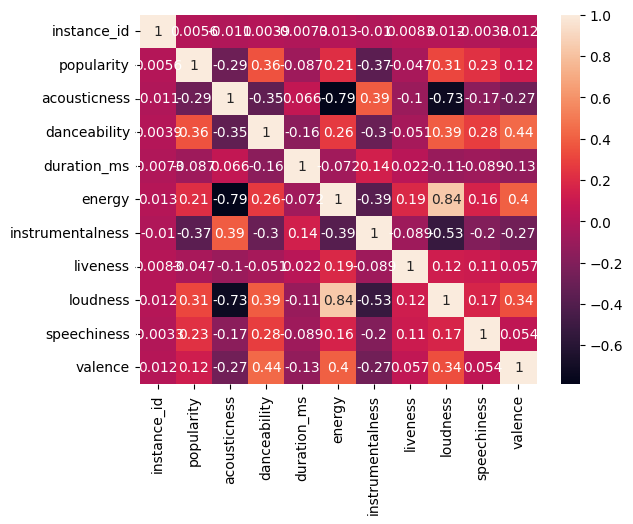

In [ ]:
seaborn.heatmap(ds.corr(), annot=True)

print(f'Корреляция между популярностью и длиной названия трека: {ds["popularity"].corr(ds["duration_ms"])}') #2

### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

Между собой по популярности схожи хип-хоп, рэп


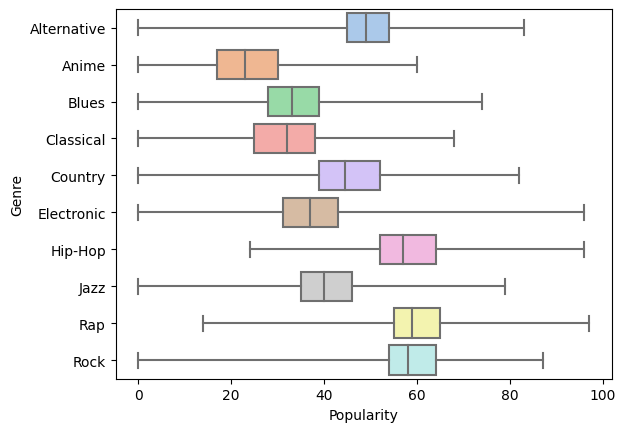

In [ ]:
ds = ds.sort_values(by="music_genre")
seaborn.boxplot(x="popularity", y="music_genre", data=ds, palette = 'pastel', whis = 15)

plt.xlabel('Popularity')
plt.ylabel('Genre')

print('Между собой по популярности схожи хип-хоп, рэп')

### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

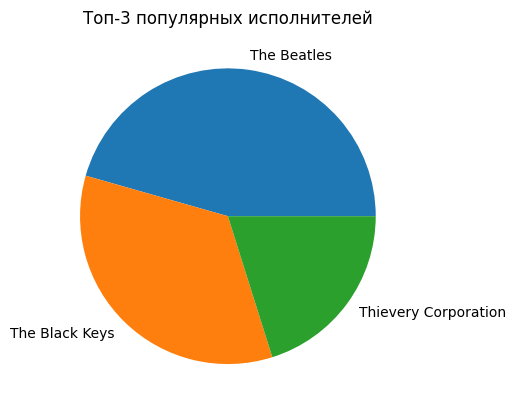

In [ ]:
genres = ds["music_genre"].value_counts().head(3).index.tolist()
tops = []
for g in genres:
    ds_2 = ds[ds["music_genre"] == g]
    top_artist = ds_2.groupby("artist_name")['popularity'].sum().nlargest(1).index[0]
    tops.append(top_artist)

ds_2 = ds[(ds["music_genre"].isin(genres)) & (ds["artist_name"].isin(tops))]
popularity_by_artist = ds_2.groupby("artist_name")["popularity"].sum()
fig, ax = mp.subplots()
ax.pie(popularity_by_artist, labels=popularity_by_artist.index)
ax.set_title('Топ-3 популярных исполнителей')
plt.show()

### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

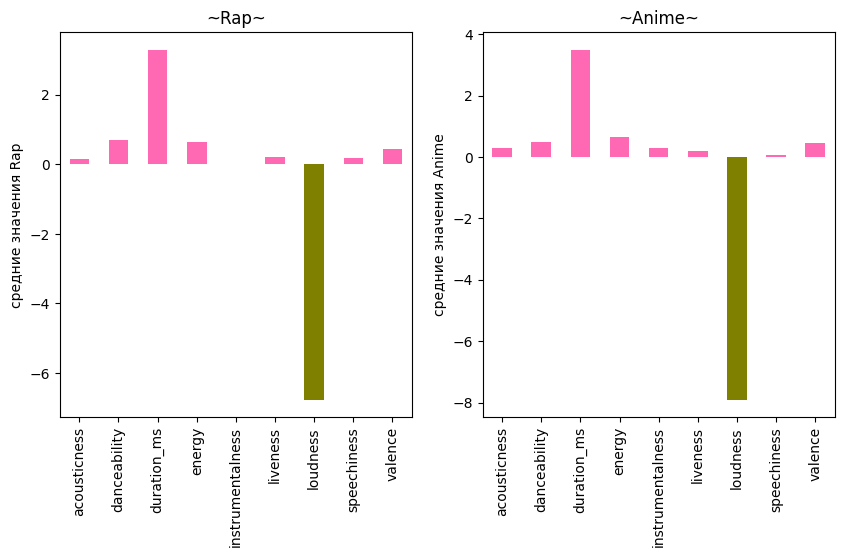

In [ ]:
ds = pd.read_csv("music_genre.csv")
ds = ds.sample(n=20000)
ds = ds.drop_duplicates()
ds = ds[(ds.artist_name != "empty_field")]

ds.loc[:, "duration_ms"] = ds["duration_ms"]/60000
ds = ds.drop(["instance_id"], axis=1)
ds_mean = ds.groupby("music_genre").mean(numeric_only=True)
ds_mean = ds_mean.sort_values(by="popularity", ascending=False)
ds_mean = ds_mean.drop(["popularity"], axis=1)

mostpop = ds_mean.iloc[0]
lowpop = ds_mean.iloc[-1]

fig, ax = mp.subplots(1, 2, figsize=(10, 5))

ax[0].set_title(f"~{mostpop.name}~")
ax[1].set_title(f"~{lowpop.name}~")
ax[0].set_ylabel(f"средние значения {mostpop.name}")
ax[1].set_ylabel(f"средние значения {lowpop.name}")
ax[0].set_xticks(range(len(ds_mean.columns)))
ax[1].set_xticks(range(len(ds_mean.columns)))
ax[0].set_xticklabels(ds_mean.columns)
ax[1].set_xticklabels(ds_mean.columns)


mostpop.plot.bar(ax=ax[0], color=["hotpink" if x > 0 else "olive" for x in mostpop])
lowpop.plot.bar(ax=ax[1], color=["hotpink" if x > 0 else "olive" for x in lowpop])
plt.show()

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min).
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [ ]:
ds = pd.read_csv("music_genre.csv")
ds = ds.sample(n=20000)
ds = ds.drop_duplicates()
ds = ds[(ds.artist_name != "empty_field")]

def duration(duration): #1
    if duration <= 3 * 60 * 1000:
        return "короткая"
    elif duration <= 5 * 60 * 1000:
        return "средняя"
    else:
        return "длинная"


ds["длительность_трека"] = ds["duration_ms"].apply(duration)
ds

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека
25303,41244.0,Kodak Black,Pimpin Ain't Eazy,74.0,0.31100,0.644,177000.0,0.501,0.000000,C,0.1060,-8.959,Major,0.4920,129.828,4-Apr,0.173,Rap,короткая
37819,69504.0,Temple Of The Dog,Say Hello 2 Heaven - 25th Anniversary Mix,59.0,0.05760,0.303,384467.0,0.768,0.000009,C,0.3730,-6.672,Major,0.0334,148.732,3-Apr,0.283,Rock,длинная
30164,46228.0,Deep Purple,Mistreated,30.0,0.06530,0.423,448080.0,0.627,0.017700,F#,0.3400,-6.612,Minor,0.0374,127.65299999999999,4-Apr,0.524,Blues,длинная
23118,69943.0,Johnny Cash,Rusty Cage,54.0,0.57700,0.542,168400.0,0.718,0.002300,D,0.3830,-5.806,Major,0.0334,112.053,4-Apr,0.484,Country,короткая
9542,39567.0,Capcom Sound Team,Ken's Theme,21.0,0.05250,0.456,197387.0,0.811,0.974000,C#,0.1490,-11.573,Minor,0.0365,89.62100000000001,4-Apr,0.915,Anime,средняя
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23605,80390.0,Brooks & Dunn,I Can't Get Over You,36.0,0.02280,0.618,246560.0,0.750,0.001010,C,0.0634,-3.523,Major,0.0241,?,4-Apr,0.338,Country,средняя
14786,23934.0,Fat Freddy's Drop,The Raft,41.0,0.01560,0.670,431293.0,0.531,0.345000,A,0.3060,-8.267,Minor,0.0377,139.385,4-Apr,0.336,Jazz,длинная
18277,37330.0,Alien Ant Farm,Wish,48.0,0.00016,0.556,201800.0,0.924,0.131000,F#,0.3370,-4.458,Major,0.1330,?,4-Apr,0.471,Alternative,средняя
30777,40189.0,"Crosby, Stills, Nash & Young","Medley: The Loner, Cinnamon Girl, Down by the ...",42.0,0.49500,0.400,580667.0,0.407,0.000260,G#,0.9410,-12.981,Major,0.0554,170.38400000000001,4-Apr,0.412,Blues,длинная


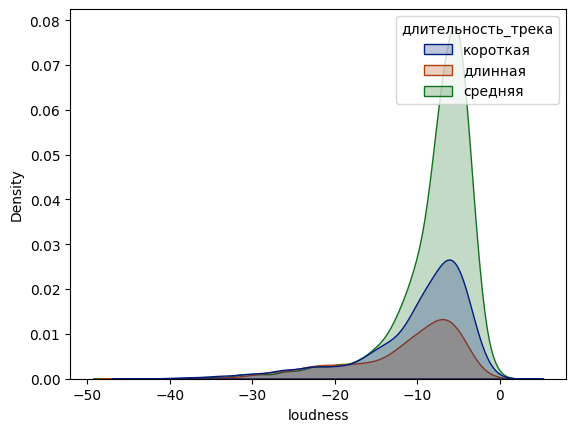

In [ ]:
seaborn.kdeplot(data=ds, x='loudness', palette='dark', hue='длительность_трека', fill=True) #2
plt.show()

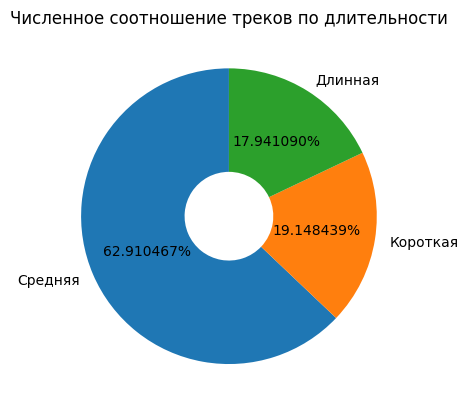

In [ ]:
ds = pd.read_csv("music_genre.csv")
ds = ds.sample(n=20000)
ds = ds.drop_duplicates()
ds = ds[(ds.artist_name != "empty_field")]

duration_bins = [0, 180000, 300000, float('inf')] #3
duration_labels = ['Короткая', 'Средняя', 'Длинная']
ds['duration_ms'] = pd.cut(ds['duration_ms'], bins=duration_bins, labels=duration_labels)
duration_counts = ds['duration_ms'].value_counts()
plt.pie(duration_counts, labels=duration_counts.index, autopct='%1f%%', startangle=90, wedgeprops={'width': 0.7})
plt.title('Численное соотношение треков по длительности')
plt.show()

## Часть 2

Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

Задание для части 2 выполняйте в отдельном гугл-колабе, настроенном для языка R. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

## Часть 3 (дополнительная)

Часть не является обязательной, но ее верное(!) выполнение освобождает вас от защиты работы.

Выполните на языке SQL следующие задания:
- задание 1 – пункт 4
- задание 2 – пункты 1, 3, 4
- задание 3 – целиком, но без графика во втором пункте
- задание 4 – не выполнять
- задание 5 – не выполнять
- задание 6 – не выполнять
- задание 7 – не выполнять
- задание 8 – пункт 1 и пункт 3 (в 3 пункте просто посчитайте количество треков каждой длительности)

Задание для части 3 выполняйте в отдельном гугл-колабе. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

#### Пример

In [ ]:
import pandas as pd
df = pd.read_csv("music_genre.csv")
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
df[["artist_name", "track_name", "music_genre"]].values.tolist()[:10]

[['Röyksopp', "Röyksopp's Night Out", 'Electronic'],
 ['Thievery Corporation', 'The Shining Path', 'Electronic'],
 ['Dillon Francis', 'Hurricane', 'Electronic'],
 ['Dubloadz', 'Nitro', 'Electronic'],
 ['What So Not', 'Divide & Conquer', 'Electronic'],
 ['Axel Boman', 'Hello', 'Electronic'],
 ['Jordan Comolli', 'Clash', 'Electronic'],
 ['Hraach', 'Delirio', 'Electronic'],
 ['Kayzo', 'NEVER ALONE', 'Electronic'],
 ['Shlump', 'Lazer Beam', 'Electronic']]

In [ ]:
import sqlite3

# создаем таблицу в БД
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE music (artist, track, genre);")

# переносим в таблицу данные
cur.executemany("INSERT INTO music (artist, track, genre) "
                "VALUES (?, ?, ?);",
                df[["artist_name", "track_name", "music_genre"]].values.tolist())

# сохраняем изменения
con.commit()

# создаем и выполняем запрос
get_songs_per_artist = "SELECT artist, " \
       "COUNT(artist) AS number_of_songs " \
       "FROM music " \
       "GROUP BY artist " \
       "ORDER BY number_of_songs " \
       "DESC;"
cur.execute(get_songs_per_artist)

result = cur.fetchall()
result[:20]

[('empty_field', 2489),
 ('Nobuo Uematsu', 429),
 ('Wolfgang Amadeus Mozart', 402),
 ('Ludwig van Beethoven', 317),
 ('Johann Sebastian Bach', 314),
 ('Frédéric Chopin', 241),
 ('Drake', 172),
 ('Capcom Sound Team', 169),
 ('Yuki Hayashi', 167),
 ('Eminem', 147),
 ('Future', 124),
 ('Thievery Corporation', 122),
 ('The Black Keys', 114),
 ('Pyotr Ilyich Tchaikovsky', 103),
 ('Kevin Gates', 102),
 ('Mac Miller', 97),
 ('Howard Shore', 93),
 ('Logic', 92),
 ('$uicideBoy$', 92),
 ('Ryuichi Sakamoto', 90)]